# Plot Sentinel data

Initialize the session

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import plotnine as p9
from plotnine import ggplot, aes, geom_point, geom_line
import re
from datetime import datetime
import sys
pyscripts_path = '/content/drive/MyDrive/_Research projects/asiaAg/pyscripts'
sys.path.append(pyscripts_path)

Read and print s2 data

In [141]:
sent_path = os.path.join(pyscripts_path, 'asiaAg_GEE')
s2_l0_ts_path = os.path.join(sent_path,'s2_loc_0_ts.csv')

# r dplyr / pandas: https://nbviewer.org/gist/TomAugspurger/6e052140eaa5fdb6e8c0
s2_l0_ts = pd.read_csv(s2_l0_ts_path)

s2_l0_ts['date_str'] = [re.sub("([0-9]+)_.*", "\\1", x) for x in s2_l0_ts['image_id']]
s2_l0_ts['datetime'] = [datetime.strptime(x, "%Y%m%dT%H%M%S") for x in s2_l0_ts['date_str']]
s2_l0_ts['year'] = [int(datetime.strftime(x, "%Y")) for x in s2_l0_ts['datetime']]


s2_l0_ts['ndvi'] = (s2_l0_ts['B8'] - s2_l0_ts['B4']) / (s2_l0_ts['B8'] + s2_l0_ts['B4'])
# s2_l0_ts['datetime'] = [datetime.strptime(x, "%Y%m%d") for x in s2_l0_ts['date_str']]
# s2_l0_ts['date'] = [datetime.strptime(x, "%Y%m%d") for x in s2_l0_ts['date_str']]

s2_l0_ts
# s2_l0_ts.assign(date = [])
# ggplot(s2_l0_ts, aes

,B8,B4,B3,B2,clouds,cloudmask,shadows,probability,loc_id,pt_id,image_id,date_str,datetime,year,ndvi
0,2021,414,477,272,0,0,0.0,1,0,0,20181218T052221_20181218T053013_T43PEP,20181218T052221,2018-12-18 05:22:21,2018,0.659959
1,2381,593,625,374,0,0,0.0,1,0,1,20181218T052221_20181218T053013_T43PEP,20181218T052221,2018-12-18 05:22:21,2018,0.601210
2,2275,651,639,397,0,0,0.0,1,0,2,20181218T052221_20181218T053013_T43PEP,20181218T052221,2018-12-18 05:22:21,2018,0.555024
3,2853,431,546,305,0,0,0.0,2,0,3,20181218T052221_20181218T053013_T43PEP,20181218T052221,2018-12-18 05:22:21,2018,0.737515
4,2343,241,388,203,0,0,0.0,1,0,4,20181218T052221_20181218T053013_T43PEP,20181218T052221,2018-12-18 05:22:21,2018,0.813467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15175,1992,1417,1540,1457,0,0,0.0,14,0,105,20220426T051649_20220426T053428_T43PEP,20220426T051649,2022-04-26 05:16:49,2022,0.168671
15176,4430,1334,1580,1372,0,0,0.0,6,0,106,20220426T051649_20220426T053428_T43PEP,20220426T051649,2022-04-26 05:16:49,2022,0.537127
15177,4082,1290,1478,1337,0,0,0.0,4,0,107,20220426T051649_20220426T053428_T43PEP,20220426T051649,2022-04-26 05:16:49,2022,0.519732
15178,4237,1310,1519,1355,0,0,0.0,5,0,108,20220426T051649_20220426T053428_T43PEP,20220426T051649,2022-04-26 05:16:49,2022,0.527673


Read and print s1 data

In [168]:
s1_l0_ts_path = os.path.join(sent_path,'s1_loc_0_ts.csv')

# r dplyr / pandas: https://nbviewer.org/gist/TomAugspurger/6e052140eaa5fdb6e8c0
s1_l0_ts = pd.read_csv(s1_l0_ts_path)#.iloc[0:7]

# s1_l0_ts['id_str'] = [re.sub("(.*?)_20[0-9]+T.*", "\\1", x) for x in s1_l0_ts['image_id']]
s1_l0_ts['date_str'] = [re.sub(".*?_([0-9]+T[0-9]+)_.*", "\\1", x) for x in s1_l0_ts['image_id']]
s1_l0_ts['datetime'] = [datetime.strptime(x, "%Y%m%dT%H%M%S") for x in s1_l0_ts['date_str']]
s1_l0_ts['year'] = [int(datetime.strftime(x, "%Y")) for x in s1_l0_ts['datetime']]

def rescale(x, lower = 0, upper = 1):
  minx = x.min()
  maxx = x.max()
  rescale_range = upper - lower
  x_rescaled = ((x - minx)/(maxx - minx) * rescale_range) + lower
  return x_rescaled

# s1_l0_ts['VV_scaled'] = (s1_l0_ts.VV - s1_l0_ts.VV.min()) / (s1_l0_ts.VV.max() - s1_l0_ts.VV.min())
s1_l0_ts['Backscatter'] = s1_l0_ts['VV'] + s1_l0_ts['VH']
s1_l0_ts['VV_scaled'] = rescale(s1_l0_ts.VV, -1, 1)
s1_l0_ts['VH_scaled'] = rescale(s1_l0_ts.VH, -1, 1)
s1_l0_ts['Backscatter_rescaled'] = rescale(s1_l0_ts.Backscatter, -1, 1)


# s1_l0_ts['ndvi'] = (s1_l0_ts['B8'] - s1_l0_ts['B4']) / (s1_l0_ts['B8'] + s1_l0_ts['B4'])
# s1_l0_ts['datetime'] = [datetime.strptime(x, "%Y%m%d") for x in s1_l0_ts['date_str']]
# s1_l0_ts['date'] = [datetime.strptime(x, "%Y%m%d") for x in s1_l0_ts['date_str']]

s1_l0_ts

,HH,VV,HV,VH,angle,loc_id,pt_id,image_id,date_str,datetime,year,Backscatter,VV_scaled,VH_scaled,Backscatter_rescaled
0,NaN,-11.239817,NaN,-24.294302,34.787838,0,0,S1A_IW_GRDH_1SDV_20150303T004756_20150303T0048...,20150303T004756,2015-03-03 00:47:56,2015,-35.534119,0.417995,-0.035445,0.011913
1,NaN,-11.159658,NaN,-21.257098,34.775555,0,1,S1A_IW_GRDH_1SDV_20150303T004756_20150303T0048...,20150303T004756,2015-03-03 00:47:56,2015,-32.416756,0.422286,0.146152,0.126383
2,NaN,-8.098888,NaN,-18.437551,34.762623,0,2,S1A_IW_GRDH_1SDV_20150303T004756_20150303T0048...,20150303T004756,2015-03-03 00:47:56,2015,-26.536440,0.586151,0.314735,0.342309
3,NaN,-12.026189,NaN,-12.531153,34.750332,0,3,S1A_IW_GRDH_1SDV_20150303T004756_20150303T0048...,20150303T004756,2015-03-03 00:47:56,2015,-24.557342,0.375895,0.667883,0.414982
4,NaN,-7.119554,NaN,-15.791918,34.737392,0,4,S1A_IW_GRDH_1SDV_20150303T004756_20150303T0048...,20150303T004756,2015-03-03 00:47:56,2015,-22.911472,0.638582,0.472919,0.475418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17398,NaN,-14.442497,NaN,-19.241643,34.675854,0,105,S1B_IW_GRDH_1SDV_20200118T004757_20200118T0048...,20200118T004757,2020-01-18 00:47:57,2020,-33.684141,0.246533,0.266657,0.079844
17399,NaN,-5.761715,NaN,-12.607199,34.662918,0,106,S1B_IW_GRDH_1SDV_20200118T004757_20200118T0048...,20200118T004757,2020-01-18 00:47:57,2020,-18.368914,0.711276,0.663336,0.642222
17400,NaN,-10.317248,NaN,-18.403085,34.650623,0,107,S1B_IW_GRDH_1SDV_20200118T004757_20200118T0048...,20200118T004757,2020-01-18 00:47:57,2020,-28.720333,0.467386,0.316795,0.262116
17401,NaN,-7.836426,NaN,-10.205337,34.637680,0,108,S1B_IW_GRDH_1SDV_20200118T004757_20200118T0048...,20200118T004757,2020-01-18 00:47:57,2020,-18.041763,0.600202,0.806945,0.654235


/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


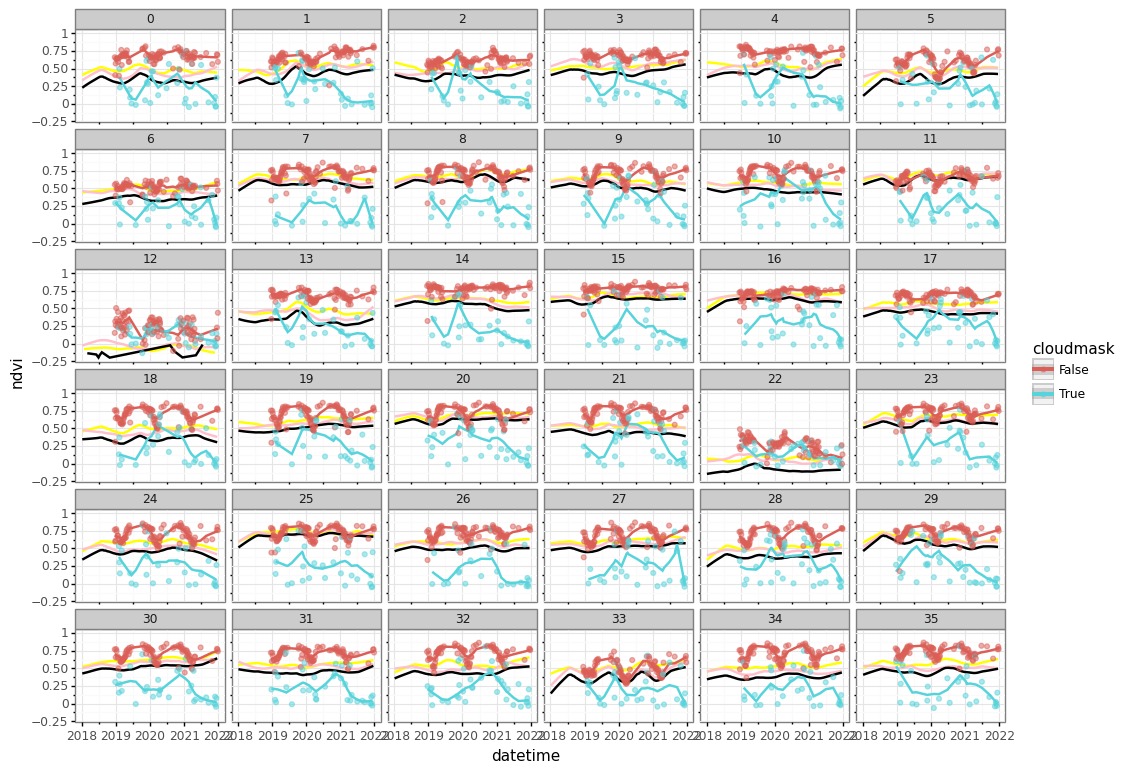

<ggplot: (8758615193465)>

In [183]:
data_query = '2018 <= year <= 2021 & pt_id < 36'
df_s2 = s2_l0_ts.assign(cloudmask = [bool(x) for x in s2_l0_ts.cloudmask]).query(data_query)
df_s1 = s1_l0_ts.query(data_query)
(ggplot(s2_l0_ts.assign(cloudmask = [bool(x) for x in s2_l0_ts.cloudmask]).query(data_query), 
       aes('datetime', 'ndvi', color = 'cloudmask')) + \
        p9.geom_smooth(data = df_s1, mapping = aes('datetime', 'VV_scaled'), color = 'yellow', span = 0.25) + \
        p9.geom_smooth(data = df_s1, mapping = aes('datetime', 'VH_scaled'), color = 'pink', span = 0.25) + \
        p9.geom_smooth(data = df_s1, mapping = aes('datetime', 'Backscatter_rescaled'), color = 'black', span = 0.25) + \
        p9.geom_smooth(span = 0.3) + \
        geom_point(alpha = 0.5) + \
        p9.scale_x_datetime(date_breaks = '1 year', date_labels = "%Y") + \
        p9.scale_y_continuous(limits = [-0.2, 1]) + \
        p9.facet_wrap('~pt_id') + \
        p9.theme_bw() + \
        p9.theme(figure_size=(12, 9)))